In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def load_history(version):
    with open(f'./model_data/history_{version}.pkl', 'rb') as handle:
        return pickle.load(handle)

In [3]:
history = load_history('03')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
history.keys()

dict_keys([(0.01, 1), (0.001, 1), (0.0001, 1), (1e-05, 1), (0.01, 2), (0.001, 2), (0.0001, 2), (1e-05, 2), (0.01, 3), (0.001, 3), (0.0001, 3), (1e-05, 3), (0.01, 4), (0.001, 4), (0.0001, 4), (1e-05, 4), (0.01, 5), (0.01, 6), (0.001, 5), (0.001, 6), (0.0001, 5), (0.0001, 6), (1e-05, 5), (1e-05, 6), (0.01, 7), (0.01, 8), (0.001, 7), (0.001, 8), (0.0001, 7), (0.0001, 8), (1e-05, 7), (1e-05, 8)])

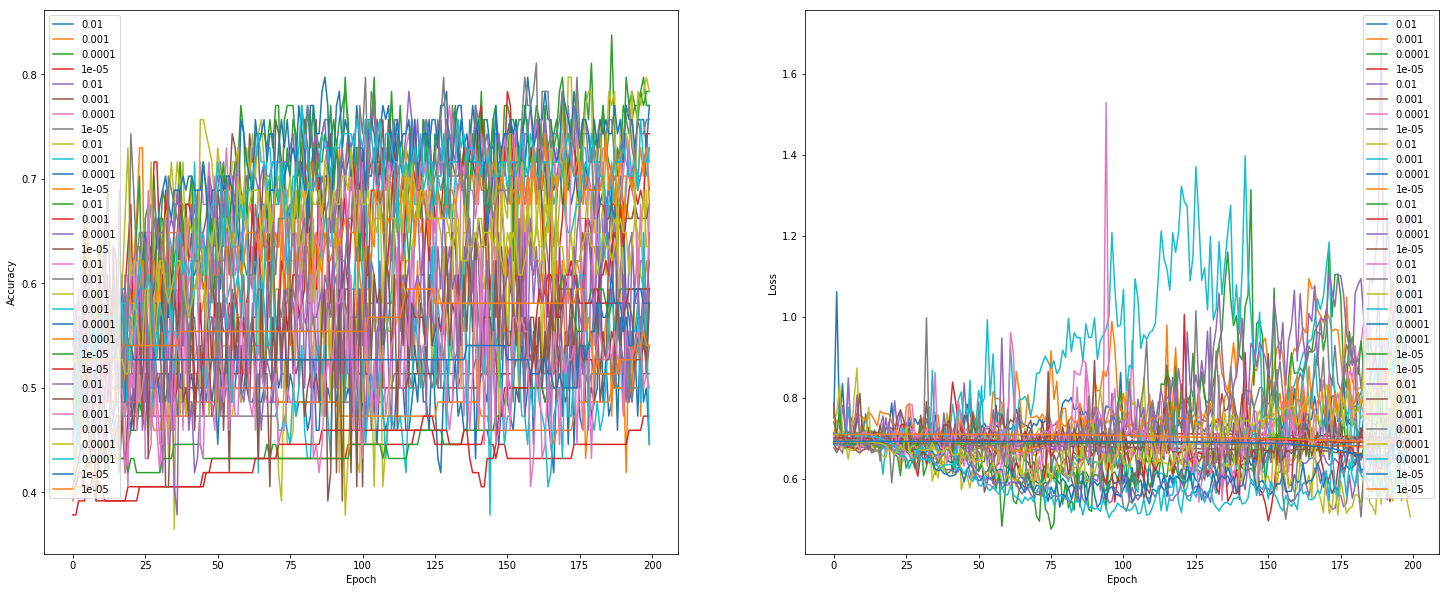

In [5]:
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

for hs in history:
    h = history[hs]
   

    #ax1.plot(h.history['acc'], label='train')
    ax1.plot(h.history['val_acc'], label=str(hs[0]))

    #ax2.plot(h.history['loss'], label='train')
    ax2.plot(h.history['val_loss'],  label=str(hs[0]))

    ax1.set_xlabel('Epoch')
    ax2.set_xlabel('Epoch')
    ax1.legend()
    ax2.legend()

    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')


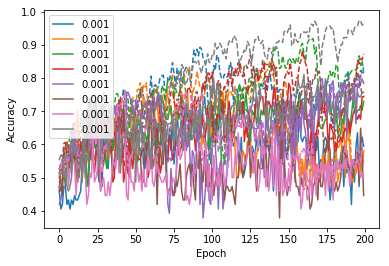

In [6]:
fig, ax = plt.subplots(1, figsize=(6,4))



for hs in history:
    h = history[hs]
    if hs[0]==0.001:
        line, = ax.plot(h.history['val_acc'], label=str(hs[0]))
        ax.plot(h.history['acc'],'--',  color=line.get_color())

        ax.set_xlabel('Epoch')
        ax.legend()
        ax.set_ylabel('Accuracy')


Text(0, 0.5, 'Loss')

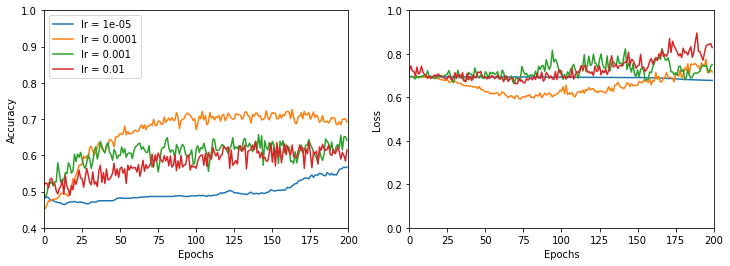

In [7]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(12,4))
lrs = sorted(set([x[0] for x in history.keys()]))
for lr in lrs:
    accuracy = np.mean([history[i].history['acc'] for i in history if i[0]==lr],0)
    accuracy_val = np.mean([history[i].history['val_acc'] for i in history if i[0]==lr],0)
    line, = ax.plot(accuracy_val, label=f'lr = {lr}')
    #ax.plot(accuracy,  color=line.get_color(), alpha=0.4, linewidth=4)
    
    loss = np.mean([history[i].history['loss'] for i in history if i[0]==lr],0)
    loss_val = np.mean([history[i].history['val_loss'] for i in history if i[0]==lr],0)
    ax2.plot(loss_val, label=f'lr = {lr}', color=line.get_color())
    #ax2.plot(loss,  color=line.get_color(), alpha=0.4, linewidth=4)
    
ax.legend(loc=2)
ax.set_xlim(0, len(accuracy))
ax.set_ylim(0.4, 1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

ax2.set_xlim(0, len(accuracy))
ax2.set_ylim(0, 1)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')


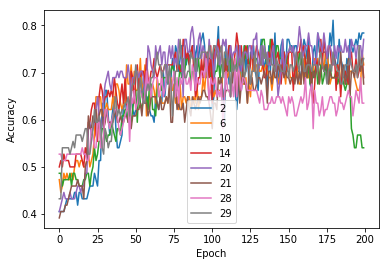

In [11]:
fig, ax = plt.subplots(1, figsize=(6,4))



for index, hs in enumerate(history):
    h = history[hs]
    if hs[0]==0.0001:
        line, = ax.plot(h.history['val_acc'], label=str(index))
        #ax.plot(h.history['acc'],'--',  color=line.get_color())

        ax.set_xlabel('Epoch')
        ax.legend()
        ax.set_ylabel('Accuracy')

In [12]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [6]:
hh = history[(0.01, 1)]

In [13]:
import pandas as pd

In [25]:
df = pd.DataFrame(columns=['a', 'b'], dtype=np.int)

In [31]:
def df_empty(columns, dtypes, index=None):
    assert len(columns)==len(dtypes)
    df = pd.DataFrame(index=index)
    for c,d in zip(columns, dtypes):
        df[c] = pd.Series(dtype=d)
    return df

In [68]:
df = df_empty(columns=['a', 'b'], dtypes=['int8', 'O'])

In [69]:
df = df.append({'a':12, 'b':hh}, ignore_index=True)

In [60]:
aa  = df.loc[1]['b']

In [89]:
grid_dtypes = {
    'seed_sklearn':np.int,
    'seed_numpy':np.int,
    'seed_tensorflow':np.int,
    'LSTM_size':np.int,
    'learning_rate':np.float,
    'batch_size':np.int,
    'fit_out':'O'
}

grid = pd.DataFrame()
for key in sorted(grid_dtypes.keys()):
    grid[key] = pd.Series(dtype=grid_dtypes[key])


grid_data = {
    'seed_sklearn':1,
    'seed_numpy':1,
    'seed_tensorflow':1,
    'LSTM_size':128,
    'learning_rate':0.001,
    'batch_size':64,
    'fit_out':hh
}


grid = grid.append(grid_data, ignore_index=True)
grid


,LSTM_size,batch_size,fit_out,learning_rate,seed_numpy,seed_sklearn,seed_tensorflow
0,128,64,<keras.callbacks.History object at 0x000001819...,0.001,1,1,1


In [88]:
grid_data = {
    'seed_sklearn':2,
    'seed_numpy':5,
    'seed_tensorflow':1,
    'LSTM_size':128,
    'learning_rate':0.001,
    'batch_size':64,
    'fit_out':hh
}

df = df.append(grid_data, ignore_index=True)
df

,LSTM_size,batch_size,fit_out,learning_rate,seed_numpy,seed_sklearn,seed_tensorflow
0,128,64,<keras.callbacks.History object at 0x000001819...,0.001,1,1,1
1,128,64,<keras.callbacks.History object at 0x000001819...,0.001,5,2,1


In [91]:
df.to_pickle('aa.pkl')

In [3]:
fff

,LSTM_size,batch_size,fit_out,learning_rate,seed_numpy,seed_sklearn,seed_tensorflow
0,128,64,<keras.callbacks.History object at 0x0000013E1...,0.001,1,1,1
1,128,64,<keras.callbacks.History object at 0x0000013E1...,0.001,5,2,1


In [18]:
import numpy as np

In [19]:
fff.loc[0]['fit_out'].model = np.int

In [20]:
fff

,LSTM_size,batch_size,fit_out,learning_rate,seed_numpy,seed_sklearn,seed_tensorflow
0,128,64,<keras.callbacks.History object at 0x0000013E1...,0.001,1,1,1
1,128,64,<keras.callbacks.History object at 0x0000013E1...,0.001,5,2,1


In [21]:
fff.loc[0]['fit_out'].model

int